## Startup analysis

In [36]:
from datetime import datetime
import numpy as np
import pandas as pd
from matplotlib import pyplot 

def get_acquisitions():
    return pd.read_csv("data/acquisitions.csv", sep=",")
def get_degrees():
    return pd.read_csv("data/degrees.csv", sep=",")
def get_funding_rounds():
    return pd.read_csv("data/funding_rounds.csv", sep=",")
def get_funds():
    return pd.read_csv("data/funds.csv", sep=",")
def get_investments():
    return pd.read_csv("data/investments.csv", sep=",")
def get_ipos():
    return pd.read_csv("data/ipos.csv", sep=",")
def get_milestones():
    return pd.read_csv("data/milestones.csv", sep=",")
def get_objects():
    return pd.read_csv("data/objects.csv", sep=",", low_memory=False)
def get_offices():
    return pd.read_csv("data/offices.csv", sep=",")
def get_people():
    return pd.read_csv("data/people.csv", sep=",")
def get_relationships():
    return pd.read_csv("data/relationships.csv", sep=",")

# TODO: write import functions for other files
investments = get_investments()
acquistions = get_acquisitions()
degrees = get_degrees()
funding_rounds = get_funding_rounds()
funds = get_funds()
ipos = get_ipos()
milestones = get_milestones()
objects = get_objects()
offices = get_offices()
people = get_people()
relationships = get_relationships()



<BarContainer object of 10 artists>

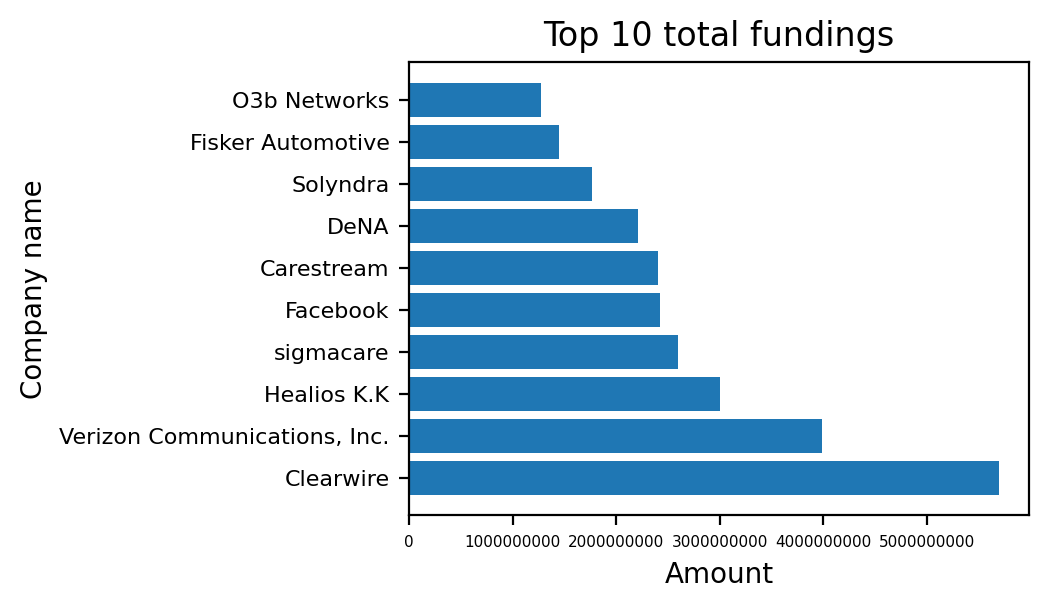

In [64]:
from matplotlib import pyplot 
total_fundings = funding_rounds.groupby("object_id", as_index=False)["raised_amount"].sum().sort_values("raised_amount", ascending=False)
total_fundings = total_fundings.merge(objects, left_on="object_id", right_on="id")[["name", "object_id", "raised_amount", "status"]]
total_fundings
fig, axes = pyplot.subplots(figsize=(4, 3), dpi=200)
axes.ticklabel_format(style='plain')
pyplot.xticks(fontsize=5.5)
pyplot.yticks(fontsize=8)
axes.set_title("Top 10 total fundings")
pyplot.xlabel("Amount")
pyplot.ylabel("Company name")
axes.barh(total_fundings["name"][:10], total_fundings["raised_amount"][:10])


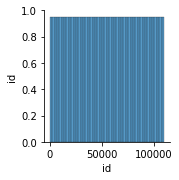

In [9]:
import seaborn as sb
sb.pairplot(degrees)

In [31]:
len(pd.unique(people["affiliation_name"]))

27248

In [46]:
len(objects[objects["funding_rounds"] > 10]["funding_rounds"])


21

In [76]:
grouped = total_fundings.groupby("status")["raised_amount"].mean()

<BarContainer object of 42 artists>

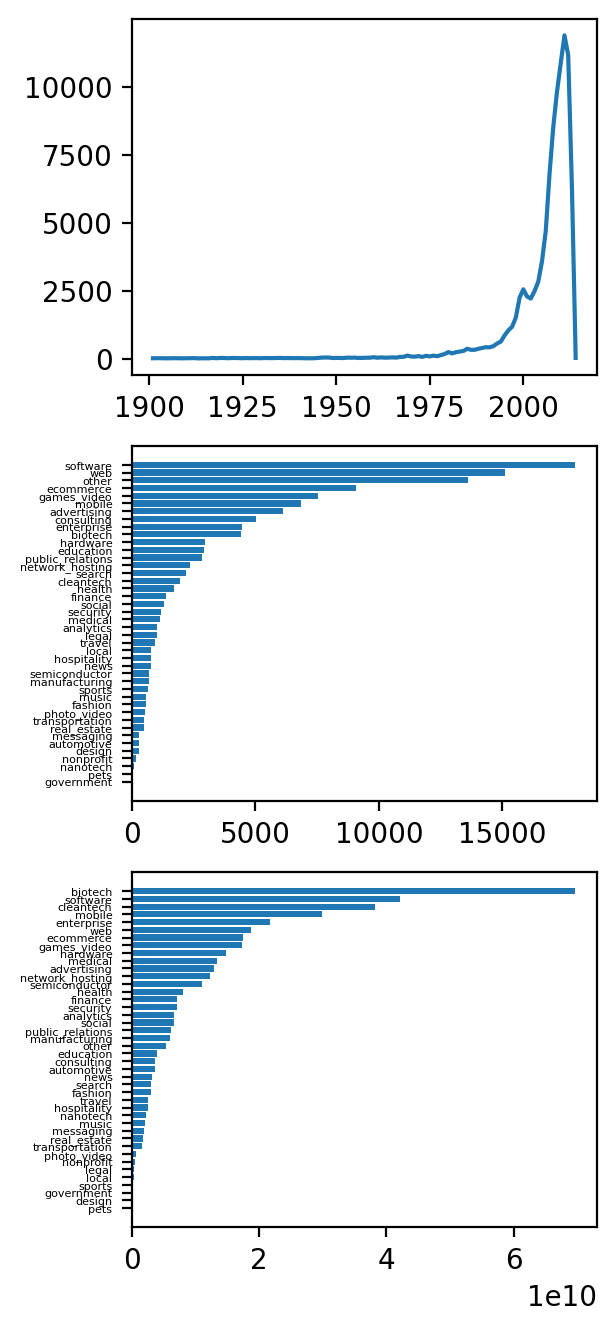

In [4]:
#Grafi: število podjetji ustvarjenih po letih, št. podjetji v vsaki inudstriji, skupna vstoa investicij v vsako industrijo
from datetime import datetime
founded_years = pd.DataFrame([datetime.strptime(str(date), '%Y-%m-%d').year for date in objects["founded_at"] if str(date) != "nan"])
count_by_year = founded_years.groupby(0).size()
count_by_category = objects.groupby("category_code").size().sort_values()
total_fundings = funding_rounds.groupby("object_id", as_index=False)["raised_amount"].sum().sort_values("raised_amount", ascending=False)
total_fundings_per_category = total_fundings.merge(objects, left_on="object_id", right_on="id")[["category_code", "raised_amount"]].groupby("category_code").sum()["raised_amount"].sort_values()
fig, axes = pyplot.subplots(3, 1, figsize=(3, 8), dpi=200)
axes[1].tick_params(axis="y", labelsize=4)
axes[1].ticklabel_format(style='plain')
axes[2].tick_params(axis="y", labelsize=4)
axes[0].plot(count_by_year.index, count_by_year.values)
axes[1].barh(count_by_category.index, count_by_category.values)
axes[2].barh(total_fundings_per_category.index, total_fundings_per_category.values)

,mean_amount,count
mean_amount,1.00000,-0.18162
count,-0.18162,1.00000


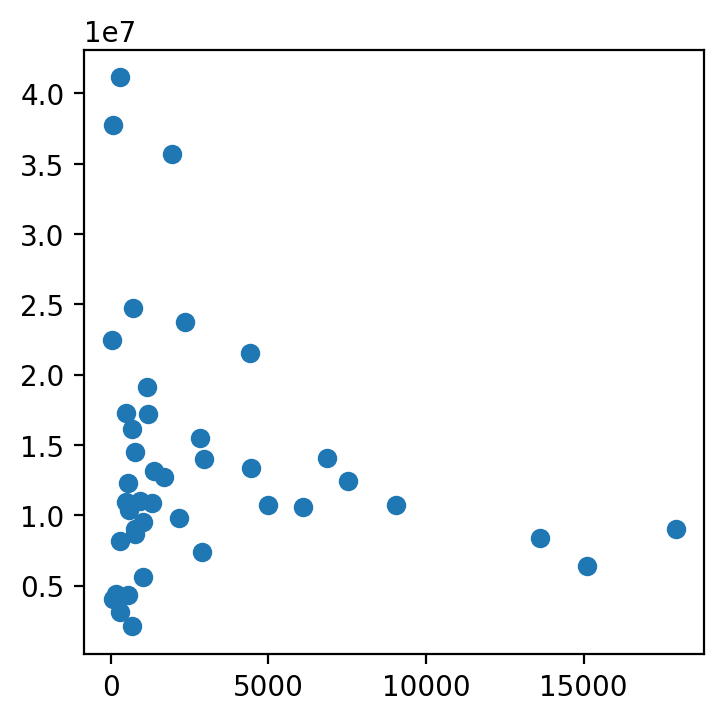

In [266]:
#Korelacija med popularnostjo industrije (skupno št. podjetji v tej industriji) in povprečno investicijo v podjetje.
count_by_category = objects.groupby("category_code").size()
total_fundings = funding_rounds.groupby("object_id", as_index=False)["raised_amount"].sum().sort_values("raised_amount", ascending=False)
mean_fundings_per_category = total_fundings.merge(objects, left_on="object_id", right_on="id")[["category_code", "raised_amount"]].groupby("category_code").mean()["raised_amount"].sort_values()
idx = count_by_category.index.intersection(mean_fundings_per_category.index)
count_by_category_intersection = count_by_category.loc[idx]
merged = pd.merge(mean_fundings_per_category.rename("mean_amount"), count_by_category_intersection.rename("count"), left_index=True, right_index=True)
fig, axes = pyplot.subplots(figsize=(4, 4), dpi=200)
axes.scatter(merged["count"], merged["mean_amount"])
cor = merged.corr()
cor

,mean_amount,count
mean_amount,1.000000,0.499594
count,0.499594,1.000000


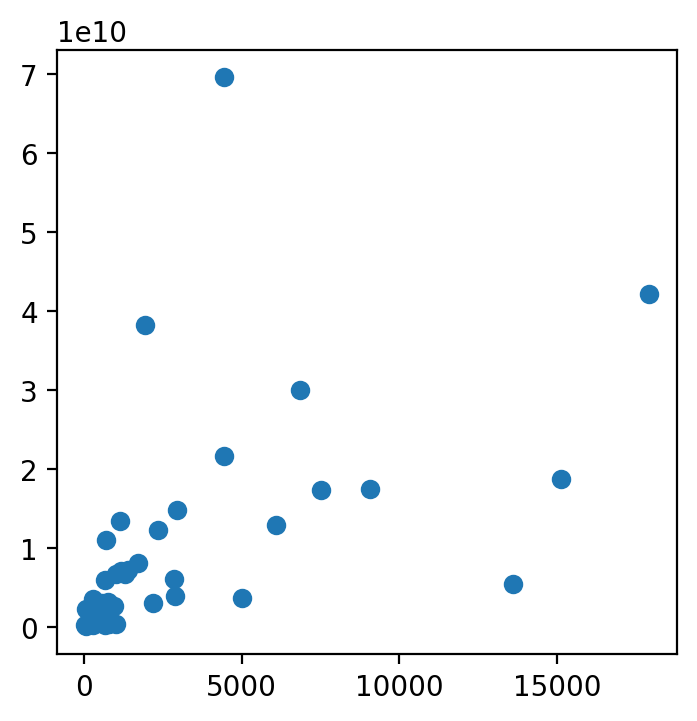

In [268]:
#Korelacija med popularnostjo industrije (skupno št. podjetji v tej industriji) in skupno vsoto investicij v to industrijo.
count_by_category = objects.groupby("category_code").size()
total_fundings = funding_rounds.groupby("object_id", as_index=False)["raised_amount"].sum().sort_values("raised_amount", ascending=False)
total_fundings_per_category = total_fundings.merge(objects, left_on="object_id", right_on="id")[["category_code", "raised_amount"]].groupby("category_code").sum()["raised_amount"].sort_values()
idx = count_by_category.index.intersection(total_fundings_per_category.index)
count_by_category_intersection = count_by_category.loc[idx]
merged = pd.merge(total_fundings_per_category.rename("mean_amount"), count_by_category_intersection.rename("count"), left_index=True, right_index=True)
fig, axes = pyplot.subplots(figsize=(4, 4), dpi=200)
axes.scatter(merged["count"], merged["mean_amount"])
cor = merged.corr()
cor

,mean_investitons,count
mean_investitons,1.000000,0.104026
count,0.104026,1.000000


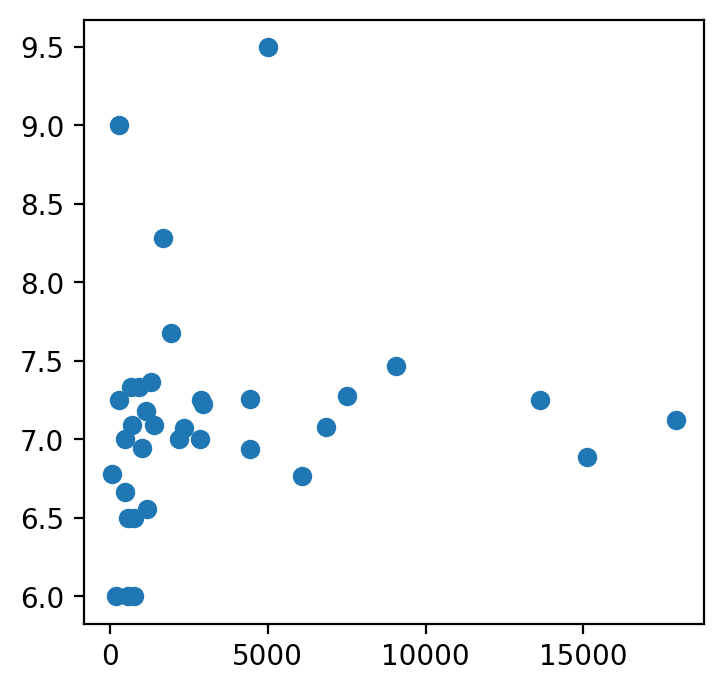

In [291]:
#Korelacija med popularnostjo industrije (skupno št. podjetji v tej industriji) in povprečnim številom investicij v to industrijo (ne vsoto investicij, dobesedno št. investicij)
count_by_category = objects.groupby("category_code").size()
num_fundings = funding_rounds.groupby("object_id", as_index=False)["raised_amount"].count().sort_values("raised_amount", ascending=False)
num_fundings_per_category = num_fundings.merge(objects, left_on="object_id", right_on="id")[["category_code", "raised_amount"]].groupby("category_code").mean()["raised_amount"].sort_values()
idx = count_by_category.index.intersection(num_fundings_per_category.index)
count_by_category_intersection = count_by_category.loc[idx]
merged = pd.merge(num_fundings_per_category.rename("mean_investitons"), count_by_category_intersection.rename("count"), left_index=True, right_index=True)
fig, axes = pyplot.subplots(figsize=(4, 4), dpi=200)
axes.scatter(merged["count"], merged["mean_investitons"])
cor = merged.corr()
cor

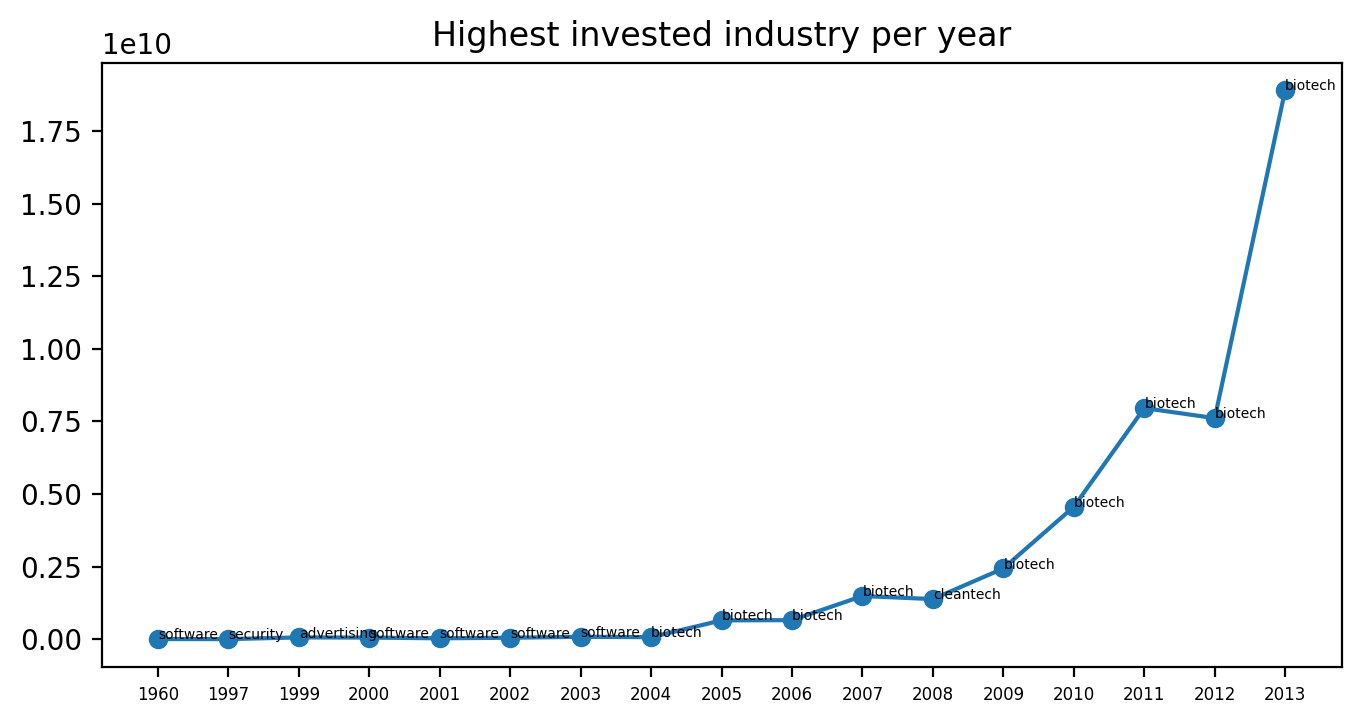

In [202]:
#Industrja z največjo investicijo vsako leto
from datetime import datetime
from matplotlib import pyplot
total_fundings_by_year = funding_rounds.copy()
total_fundings_by_year = total_fundings_by_year.dropna(axis=0)
total_fundings_by_year["funded_at"] = total_fundings_by_year["funded_at"].apply(lambda x:datetime.strptime(str(x), "%Y-%m-%d").year)
total_fundings_by_year = total_fundings_by_year.merge(objects, left_on="object_id", right_on="id")[["category_code", "raised_amount", "funded_at"]].dropna()
max_fundings_in_year = total_fundings_by_year.groupby(["funded_at", "category_code"]).sum("raised_amount")
max_fundings_in_year =  max_fundings_in_year.reset_index().loc[max_fundings_in_year.reset_index().groupby("funded_at")["raised_amount"].idxmax()]
fig, axes = pyplot.subplots(figsize=(8, 4), dpi=200)
axes.tick_params(axis="x", labelsize=6)
axes.set_title("Highest invested industry per year")
line = axes.plot(max_fundings_in_year["funded_at"].apply(lambda x: str(x)), max_fundings_in_year["raised_amount"], marker='o')
line[0].get_xdata(orig=False)
for row in zip(max_fundings_in_year["category_code"], line[0].get_xdata(orig=False), line[0].get_ydata(orig=False)):
    axes.annotate(row[0], (row[1], row[2]), size=5)

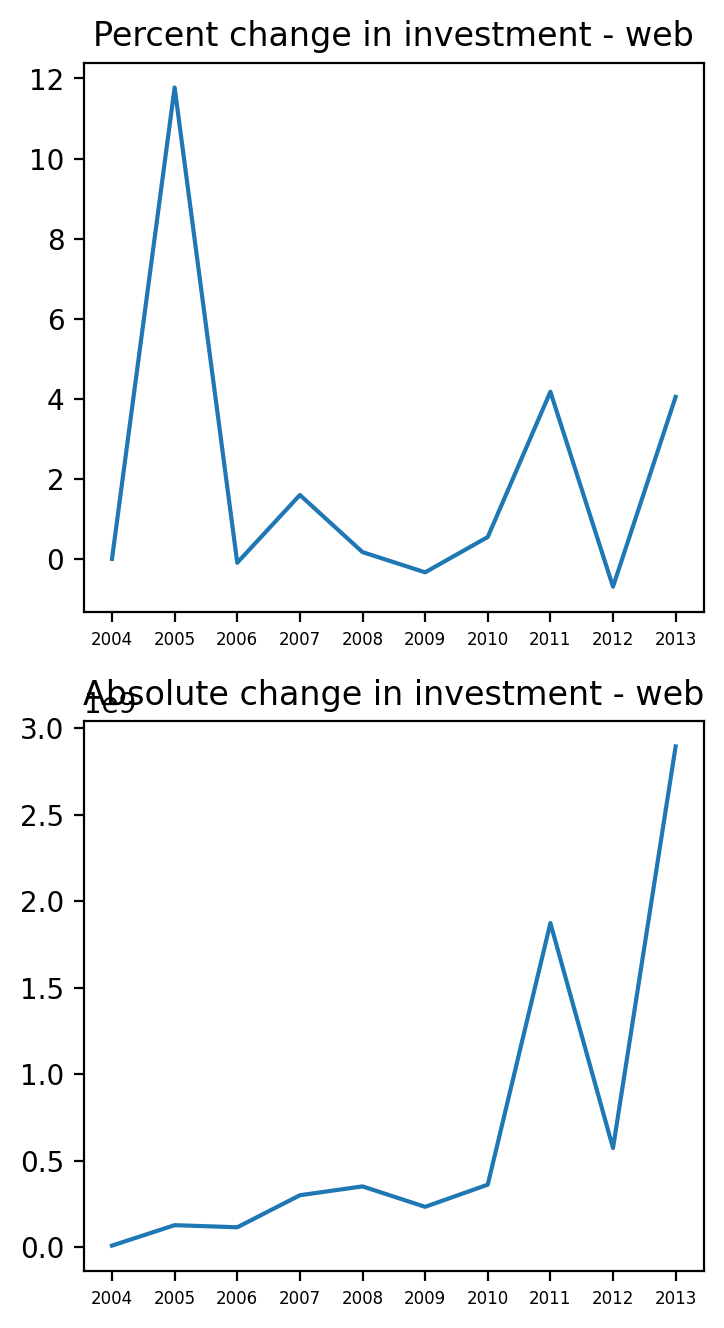

In [243]:
def get_investments_pct_changes(cat):
    total_fundings_by_year = funding_rounds.copy()
    total_fundings_by_year = total_fundings_by_year.dropna(axis=0)
    total_fundings_by_year["funded_at"] = total_fundings_by_year["funded_at"].apply(lambda x:datetime.strptime(str(x), "%Y-%m-%d").year)
    total_fundings_by_year = total_fundings_by_year.merge(objects, left_on="object_id", right_on="id")[["category_code", "raised_amount", "funded_at"]].dropna()
    grouped = total_fundings_by_year.groupby(["category_code", "funded_at"]).sum("raised_amount")
    grouped = grouped.reset_index()
    cur = grouped[grouped["category_code"] == cat]
    cur = cur.groupby(["category_code", "funded_at"]).sum()
    cur = cur.pct_change().fillna(0)
    return cur.reset_index()
def get_category_yearly_investments(cat):
    total_fundings_by_year = funding_rounds.copy()
    total_fundings_by_year = total_fundings_by_year.dropna(axis=0)
    total_fundings_by_year["funded_at"] = total_fundings_by_year["funded_at"].apply(lambda x:datetime.strptime(str(x), "%Y-%m-%d").year)
    total_fundings_by_year = total_fundings_by_year.merge(objects, left_on="object_id", right_on="id")[["category_code", "raised_amount", "funded_at"]].dropna()
    grouped = total_fundings_by_year.groupby(["category_code", "funded_at"]).sum("raised_amount")
    grouped = grouped.reset_index()[grouped.reset_index()["category_code"] == cat]
    return grouped
from matplotlib import pyplot
cat = "web"
chng = get_investments_pct_changes(cat) 
yearly = get_category_yearly_investments(cat)
fig, axes = pyplot.subplots(2, 1, figsize=(4, 8), dpi=200)
axes[0].set_title("Percent change in investment - " + cat)
axes[0].tick_params(axis="x", labelsize=6)
axes[0].plot(chng["funded_at"].apply(lambda x: str(x)), chng["raised_amount"])
axes[1].set_title("Absolute change in investment - " + cat)
axes[1].tick_params(axis="x", labelsize=6)
axes[1].plot(yearly["funded_at"].apply(lambda x: str(x)), yearly["raised_amount"])

<BarContainer object of 10 artists>

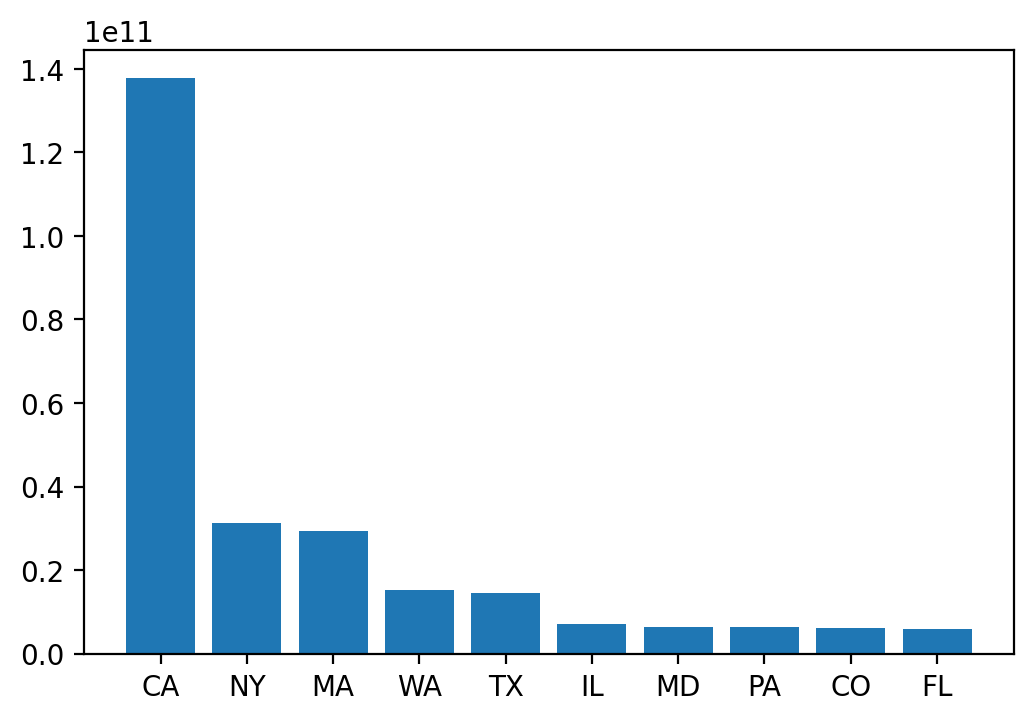

In [259]:
#Najboljše države za ustvariti podjetje?
#objects[objects[""]]
#array(['Company', 'FinancialOrg', 'Person', 'Product'], dtype=object)
funding_per_state = objects[objects["entity_type"] == "Company"].groupby("state_code")["funding_total_usd"].sum().sort_values(ascending=False).dropna()
fig, axes = pyplot.subplots(figsize=(6, 4), dpi=200)
axes.bar(funding_per_state[:10].index, funding_per_state[:10].values)



In [286]:
import sklearn
filtered = objects[objects["entity_type"] == "Company"]
part = round(len(filtered)*0.7)
sub1 = objects.iloc[:part, :]
sub2 = objects.iloc[part:, :]

id                                                              c:281867
entity_type                                                      Company
entity_id                                                         281867
parent_id                                                            NaN
name                                                           IvoryEdge
normalized_name                                                ivoryedge
permalink                                             /company/ivoryedge
category_code                                                  ecommerce
status                                                         operating
founded_at                                                    2011-01-21
closed_at                                                            NaN
domain                                                     ivoryedge.com
homepage_url                                    http://www.ivoryedge.com
twitter_username                                   